# 🎥 TMDB Exploration Project
#### By Isabelle Rajendiran

The data was sourced from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata), though it was originally sourced from the TMDB website, using their [official API](https://developer.themoviedb.org/docs/getting-started).

### Table of contents

- 0.0 - Import modules
- 1.0 - Import the data
- 2.0 - Initial data exploration and cleaning
  - 2.1 - Null handling/ Handling zero values
  - 2.2 - Duplicates
  - 2.3 - Handling strange datatypes
- 3.0 - Investigating areas of interest
  - 3.1 Top 10 production companies with the most movies produced
  - 3.2 Top 10 production companies with the highest total revenue
  - 3.3 Top 10 Warner Bros. Movies by Revenue
- 4.0 - Single movie observation analyses
  - 4.1 - Highest popularity movie: Minions
  - 4.2 - Lowest popularity movie: Woman Thou Art Loosed
  - 4.3 - Comparison of both movies
- 5.0 - Issue: mixed scales in the revenue and budget columns

## 0.0 - Import modules

In [1]:
# Import the relevant modules
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import ast

## 1.0 - Import the data

In [640]:
# Set the path to the location of 'TMDB_movies.csv'
path = "TMDB_movies.csv"

# Read in the dataset into a dataframe
tmdb = pd.read_csv(path)

In [5]:
# View the first 5 lines of the tmdb dataframe
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [554]:
# View the dataset info
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## 2.0 - Initial data exploration and cleaning

### 2.1 - Null handling/ Handling zero values

In [556]:
# View the dataset info
#tmdb.info()

This dataset contains 4803 records and 20 columns. There are NULL values.

In [9]:
# Note that this function was created by Alex

def null_vals(dataframe):
    '''A function to show both the number of nulls and the percentage of nulls in each column'''
    null_vals = dataframe.isnull().sum() # How many nulls are in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null_count']) # Create a dataframe with the number of nulls
    null_vals['percent'] = round((null_vals['null_count']/total_cnt)*100,3) # Round how many nulls there are as a % of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [11]:
# Check the nulls in each column
null_vals(tmdb)

,null_count,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


Homepage and tagline have a large NULL portion but these columns can be considered 'optional' and therefore are not outliers.

In [14]:
# View the records with the remaining NULLS
tmdb.loc[(tmdb['overview'].isnull()) | (tmdb['runtime'].isnull()) | (tmdb['release_date'].isnull())]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


The remaining NULLs can be found across the four records shown above. For my analyses, having these NULL values will not impact it greatly so no further action will be taken.

It is surprising to see that some of the revenues and budgets are '0'.

In [16]:
# Describe the dataset
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [18]:
# Count the number of records with a zero in certain columns
columns_of_interest = ['budget', 'revenue', 'runtime']

for col in columns_of_interest:
    amount = tmdb.loc[tmdb[col] == 0]['id'].count()
    print(f"Number of records with a zero in the {col} column: {amount}")

Number of records with a zero in the budget column: 1037
Number of records with a zero in the revenue column: 1427
Number of records with a zero in the runtime column: 35


All the columns apart from ID have a minimum of 0. 

According to the dataset source on [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata), in the IMDb version, values of zero in the budget field were regarded as 'missing' (with the caveat that it is more likely missing budgets originally belonged to small-budget films).

**As there are a large number of records with '0' in these columns, removing the records is not a good idea. Instead, further exploration will be carried out with the assumption that '0' is missing data for columns 'budget', 'revenue' and 'runtime' as they are less likely to be truly '0'.** 

In [22]:
# Create a dataframe replacing '0' with NaN for the relevant columns
tmdb_nulls = tmdb.copy()

for col in columns_of_interest:
    tmdb_nulls[col] = tmdb_nulls[col].replace(0, np.nan)

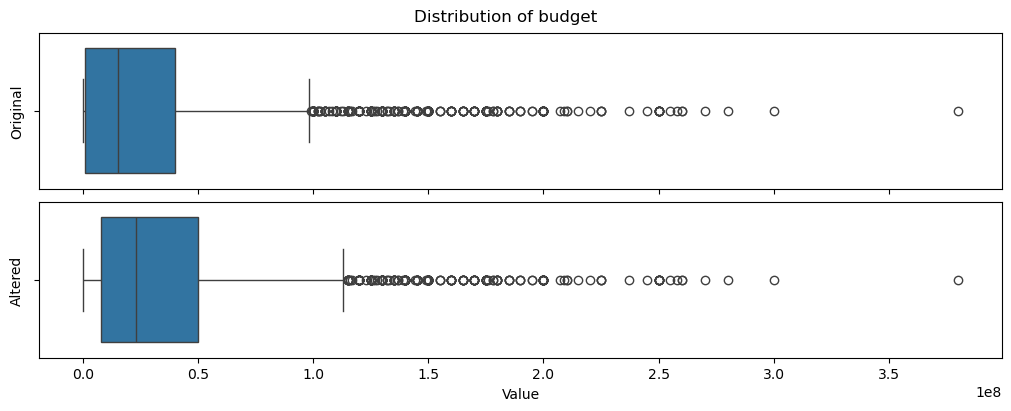

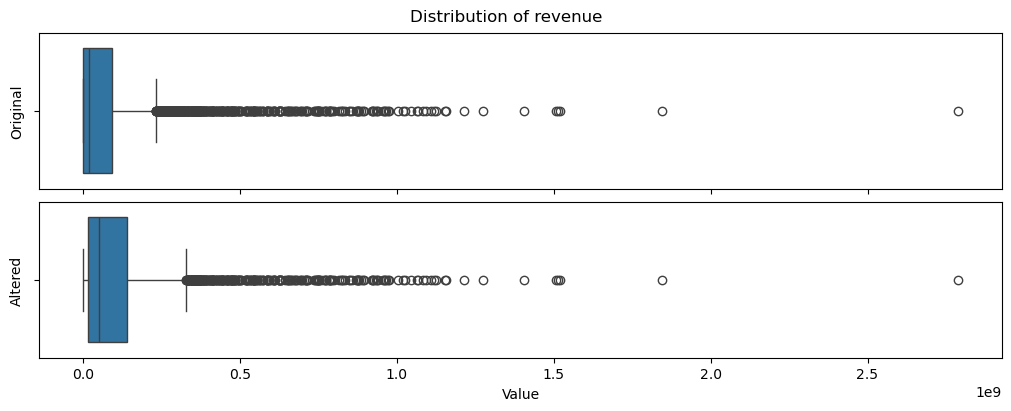

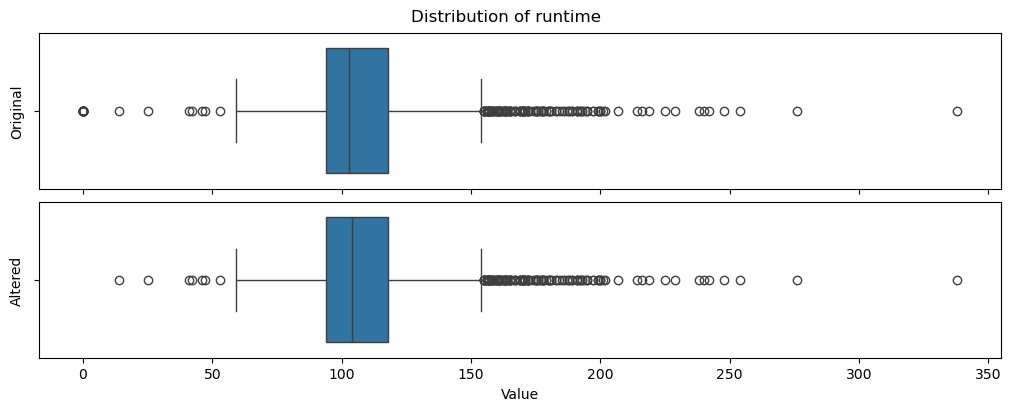

In [24]:
# Plot the distribution change of the columns

for col in columns_of_interest:
    # Create individual subplots for each column with the same shared x-axis
    fig, axs = plt.subplots(2, 1, figsize=(10, 4), constrained_layout=True, sharex=True)

    # Plot the original distribution
    sns.boxplot(data=tmdb[col], ax=axs[0], orient="h")
    axs[0].set_xlabel('Value')

    # Plot the altered distribution
    sns.boxplot(data=tmdb_nulls[col], ax=axs[1], orient="h")
    axs[1].set_xlabel('Value')

    # Add the y labels
    axs[0].set_ylabel('Original')
    axs[1].set_ylabel('Altered')

    # Add a title for each subplot
    fig.suptitle(f'Distribution of {col}')

    plt.show()

There is a change in distribution as would be expected i.e., an increase in the central tendency (mean and median) which was previously lowered due to the zero values.

### 2.2 - Duplicates

In [31]:
# Investigating duplicate records
print(tmdb_nulls.shape)
print(tmdb_nulls.drop_duplicates().shape) # The same shape so no records would be dropped

(4803, 20)
(4803, 20)


In [49]:
# Investigating duplicate titles

# Retrieve the records with duplicated titles
tmdb_nulls[tmdb_nulls['title'].duplicated(keep = False)] # Keep = False will show all the duplicates

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
972,44000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201.0,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will be one of us,The Host,6.0,1817
1359,35000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924.0,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
2877,11000000.0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643.0,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537
3647,NaN,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,NaN,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,NaN,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,NaN,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800.0,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,NaN,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


These have the same title names but are different movies so will not be removed.

### 2.3 - Handling strange datatypes

Certain columns contains elements which appear to be lists of dictionaries but are in fact string datatype.

In [52]:
# View the first record in the dataset
tmdb_nulls.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [54]:
def extract_info(x):
    ''' Function to extract the keypoints for each datapoint '''
    x = ast.literal_eval(x) # Transform '['name', 'id']' back into ['name', 'id']
    keypoints = [] # Empty list to store the keypoints
    
    # Iterate through each dictionary
    for item in x: # Iterate for each dictionary in our list
        keypoints.append(item['name']) # Grab the 'name' key for each dictionary
        
    # Return the list
    return keypoints

# Note: This function was adapted from Alex's function

# Apply the function to neccessary columns
tmdb_nulls['extracted_genres'] = tmdb_nulls['genres'].apply(extract_info)
tmdb_nulls['extracted_keywords'] = tmdb_nulls['keywords'].apply(extract_info)
tmdb_nulls['extracted_production_companies'] = tmdb_nulls['production_companies'].apply(extract_info)
tmdb_nulls['extracted_production_countries'] = tmdb_nulls['production_countries'].apply(extract_info)
tmdb_nulls['extracted_spoken_languages'] = tmdb_nulls['spoken_languages'].apply(extract_info)

In [56]:
# View the change
tmdb_nulls.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]"


## 3.0 - Investigating areas of interest


### 3.1 Top 10 production companies with the most movies produced

In [70]:
# Create a new dataframe for this analysis
tmdb_company = tmdb_nulls.copy()

# Create separate records for each production company in the extracted_production_companies column of list i.e., explode the dataframe
tmdb_company = tmdb_company.explode('extracted_production_companies', ignore_index=False)
#tmdb_company.head(3)

In [100]:
# Count the number of unique production companies
tmdb_company['extracted_production_companies'].nunique() # There are 5017 companies

5017

In [74]:
# Count the number of films (by their unique ID) for each production company
company_count = tmdb_company.groupby('extracted_production_companies')[['id']].count().sort_values(by = 'id', ascending = False).reset_index()

In [76]:
# Rename the columns
company_count.columns = ['extracted_production_companies', 'count']

In [80]:
company_count

,extracted_production_companies,count
0,Warner Bros.,319
1,Universal Pictures,311
2,Paramount Pictures,285
3,Twentieth Century Fox Film Corporation,222
4,Columbia Pictures,201
...,...,...
5012,Haddock Films S.R.L.,1
5013,Haft Entertainment,1
5014,Haishang Films,1
5015,Hal Lieberman Company,1


Note that films with multiple production companies will be counted multiple times for each seperate company.

In [98]:
# Count the number of production companies producing a single movie

company_count.loc[company_count['count'] == 1].count() # 3545 companies only produced 1 movie

extracted_production_companies    3545
count                             3545
dtype: int64

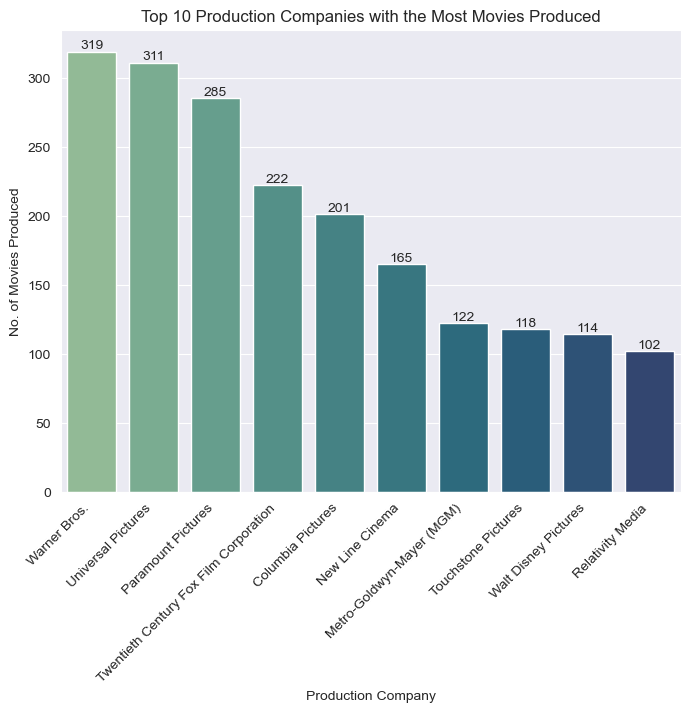

In [162]:
# Plot the top 10 companies in terms of films produced

# Set the figure sizes for the plot
plt.figure(figsize = (8,6))

# Set a style
sns.set_style("darkgrid")


# Plot the barplot
ax = sns.barplot(data = company_count.head(10),
            x = 'extracted_production_companies',
            y = 'count',
            palette = 'crest',
            hue = 'extracted_production_companies'
           )

# Adjust the x-axis labels
plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right' , # aligning them with the bars
           fontweight = 'light',
           fontsize = 'medium' # setting the fonts
          )

# Change the y and x label names
plt.ylabel("No. of Movies Produced")
plt.xlabel("Production Company")

# Give a title
plt.title('Top 10 Production Companies with the Most Movies Produced')

# Add the movie count as annotations on the bar
for i in ax.containers:
    ax.bar_label(i,)

# Save as an image
plt.savefig("Companies_by_movie_count.png", bbox_inches='tight')
    
# Show the plot
plt.show()

The top 10 production companies with the most movies produced are shown in the barplot above.

> **📗 Summary of keypoints**:
> - This dataset contains movies made by **5017** production companies.
> - Out of those 5017 companies, **3545** companies only produced a single movie.
> - The top 3 production companies (in terms on number of movies produced) are **Warner Bros.**, **Universal Pictures** and **Paramount Pictures** with a total of 319, 311 and 285 movies produced respectively.

> Note that films with multiple production companies will be counted multiple times for each seperate company.

### 3.2 Top 10 production companies with the highest total revenue

The expectation is that a similar line-up of companies will be observed, assuming that more movies produced leads to more revenue.

In [138]:
# Count the total revenue for each production company 
company_revenue = tmdb_company.groupby('extracted_production_companies')[['revenue']].sum().sort_values(by = 'revenue', ascending = False).reset_index()
#company_revenue

In [146]:
# Create a scaled column of revenue for better visualisation (in billions)
company_revenue['revenue_in_billions'] = round(company_revenue['revenue'] / 1e+9, 1)
company_revenue

,extracted_production_companies,revenue,revenue_in_billions
0,Warner Bros.,4.915575e+10,49.2
1,Universal Pictures,4.258847e+10,42.6
2,Paramount Pictures,4.087852e+10,40.9
3,Twentieth Century Fox Film Corporation,3.935715e+10,39.4
4,Walt Disney Pictures,2.868326e+10,28.7
...,...,...,...
5012,Brad Krevoy & Steve Stabler production,0.000000e+00,0.0
5013,Moving Pictures Media,0.000000e+00,0.0
5014,Movision,0.000000e+00,0.0
5015,Sontalia,0.000000e+00,0.0


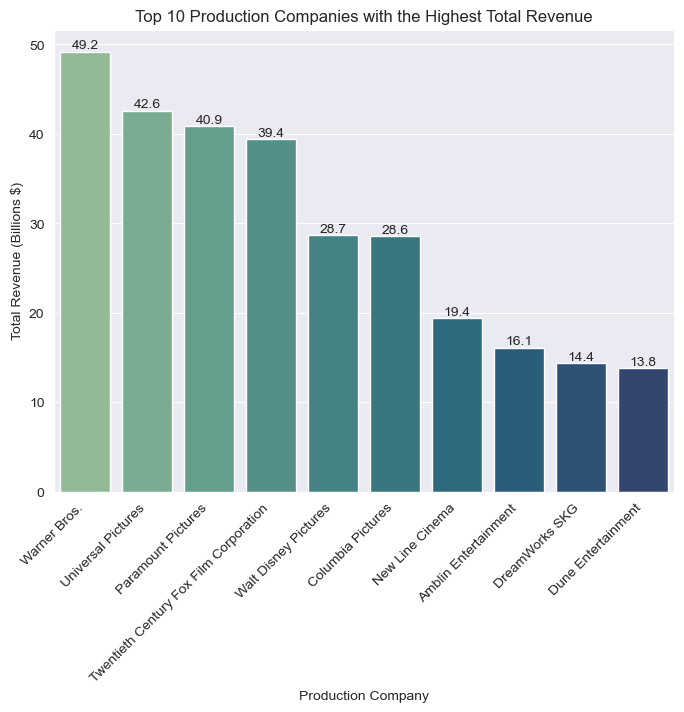

In [159]:
# Plot the top 10 companies in terms of total revenue

# Set the width,height sizes for the plot
plt.figure(figsize = (8,6))

# Set a style
sns.set_style("darkgrid")

# Plot the barplot
ax = sns.barplot(data = company_revenue.head(10),  # Plot the top 10 only
            x = 'extracted_production_companies',
            y = 'revenue_in_billions',
            palette = 'crest',
            hue = 'extracted_production_companies'
           )

# Adjust the x-axis labels
plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right' , # aligning them with the bars
           fontweight = 'light',
           fontsize = 'medium' # setting the fonts
          )

# Change the y and x label names
plt.ylabel("Total Revenue (Billions $)")
plt.xlabel("Production Company")

# Give a title
plt.title('Top 10 Production Companies with the Highest Total Revenue')

# Add the revenue sum as annotations on the bar
for i in ax.containers:
    ax.bar_label(i,)

# Save as an image
plt.savefig("Companies_by_revenue.png", bbox_inches='tight')
    
# Show the plot
plt.show()

> **📗 Summary of keypoints**:
> - The top 4 production companies with the highest revenues **is the same** as the top 4 production companies with the most movies.
> - Interestingly, Walt Disney Pictures was 9th in terms of movies produced, but 5th in revenue (less movies but more successful overall).
> - MGM, Touchstone Pictures and Relativity Media companies cannot be found in the top 10 revenue chart. This means that having more movies does not guarantee higher revenue. 

Next, we will investigate on the Warner Bros. company further as it is the company with the highest total revenue and the most movies produced.

##### Side-by-side comparison of plots

| ![Movie count](Companies_by_movie_count.png) | ![Revenue](Companies_by_revenue.png) |
|-------------------------|-------------------------|


### 3.3 Top 10 Warner Bros. movies by revenue

In [202]:
# Create a new dataframe containing only warner bros movies
warner_bros = tmdb_company.loc[tmdb_company['extracted_production_companies'] == 'Warner Bros.']
#warner_bros.head()

In [225]:
# Filter the dataframe and order it by descending revenue 
revenue_ordered = warner_bros[['original_title', 'revenue']].sort_values(by = 'revenue', ascending = False).reset_index()
#revenue_ordered.head(10)

In [233]:
# Create a scaled column of revenue for better visualisation (in millions)
revenue_ordered['revenue_in_millions'] = round(revenue_ordered['revenue'] / 1e+6, 1)
revenue_ordered.head(10)

,index,original_title,revenue,revenue_in_millions
0,3,The Dark Knight Rises,1.084939e+09,1084.9
1,65,The Dark Knight,1.004558e+09,1004.6
2,197,Harry Potter and the Philosopher's Stone,9.764756e+08,976.5
3,113,Harry Potter and the Order of the Phoenix,9.382127e+08,938.2
4,8,Harry Potter and the Half-Blood Prince,9.339592e+08,934.0
5,114,Harry Potter and the Goblet of Fire,8.959210e+08,895.9
6,276,Harry Potter and the Chamber of Secrets,8.766885e+08,876.7
7,9,Batman v Superman: Dawn of Justice,8.732602e+08,873.3
8,96,Inception,8.255328e+08,825.5
9,191,Harry Potter and the Prisoner of Azkaban,7.898046e+08,789.8


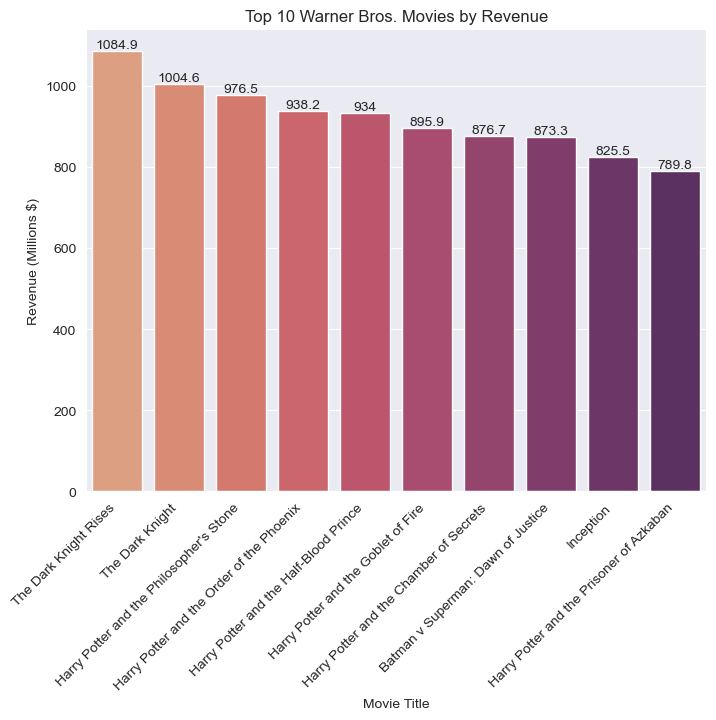

In [235]:
# Plot the top 10 most revenue making warner bros movies

# Set the width,height sizes for the plot
plt.figure(figsize = (8,6))

# Set a style
sns.set_style("darkgrid")


# Plot the barplot
ax = sns.barplot(data = revenue_ordered.head(10),
            x = 'original_title',
            y = 'revenue_in_millions',
            palette = 'flare',
            hue = 'original_title'
           )

# Adjust the x-axis labels
plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right' , # aligning them with the bars
           fontweight = 'light',
           fontsize = 'medium' # setting the fonts
          )

# Change the y and x label names
plt.ylabel("Revenue (Millions $)")
plt.xlabel("Movie Title")

# Give a title
plt.title('Top 10 Warner Bros. Movies by Revenue')

# Add the revenue as annotations on the bar
for i in ax.containers:
    ax.bar_label(i,)
    
# Show the plot
plt.show()

> **📗 Summary of keypoints**:
> - The top 2 movies belong to the [Dark Knight Trilogy](https://simple.wikipedia.org/wiki/The_Dark_Knight_Trilogy).
>   - The first movie of the trilogy (Batman Begins) ranked 39th in terms of highest revenue (refer to extra analyses below).
>     - This could possibly due to the fact that it was the first movie in the trilogy so the start of building a reputation, compared to its sequels.
> - Interestingly, 6 out of top 10 movies belong to the [Harry Potter film series](https://en.wikipedia.org/wiki/Harry_Potter_(film_series)). It is a successful film franchise.
>   - The other 2 Harry Potter movies (total of 8 movies) in the series are not in this dataset (refer to extra analyses below).

##### Extra analyses

In [242]:
# Count the number of harry potter movies in this dataset
tmdb.loc[tmdb['original_title'].str.contains('Harry Potter')]['id'].count() # Only 6 out of 8 movies

6

In [240]:
# Check for the presence of the first movie in the dark knights trilogy i.e., batman begins 
warner_bros.loc[warner_bros['original_title'] == ('Batman Begins')] # Exists in dataset

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
119,150000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www2.warnerbros.com/batmanbegins/index....,272,"[{""id"": 486, ""name"": ""himalaya""}, {""id"": 779, ...",en,Batman Begins,"Driven by tragedy, billionaire Bruce Wayne ded...",115.040024,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,Released,Evil fears the knight.,Batman Begins,7.5,7359,"[Action, Crime, Drama]","[himalaya, martial arts, dc comics, crime figh...",Warner Bros.,"[United Kingdom, United States of America]","[English, اردو, 普通话]"


In [246]:
# Calculate the rank of 'batman begins' in terms of revenue
revenue_ordered['Rank'] = revenue_ordered.index + 1

# Retrieve the dark knight trilogy rows
revenue_ordered.loc[(revenue_ordered['original_title'] == 'Batman Begins') | (revenue_ordered['original_title'].str.contains('Dark Knight'))] # 39th rank/ 319th rank

,index,original_title,revenue,revenue_in_millions,Rank
0,3,The Dark Knight Rises,1.084939e+09,1084.9,1
1,65,The Dark Knight,1.004558e+09,1004.6,2
38,119,Batman Begins,3.742187e+08,374.2,39


## 4.0 - Single movie observation analyses

I conducted single observation analyses on the least and most popular movie in this dataset, how they compare to each other and similar movies to themselves.

The 'popularity' metric, according to [TMDB](https://developer.themoviedb.org/docs/popularity-and-trending), is a 'lifetime' popularity score calculated using a variety of metrics e.g., daily votes and no. of daily users who have marked it as a 'favourite'.

### 4.1 - Highest popularity movie: Minions

In [299]:
# Display all the columns
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [387]:
# Create a dataframe with only the record(s) with the highest popularity
highest_pop = tmdb_nulls.loc[tmdb_nulls['popularity'] == tmdb_nulls['popularity'].max()]
highest_pop

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
546,74000000.0,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1.156731e+09,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits...","[Universal Pictures, Illumination Entertainment]",[United States of America],[English]


The most popular movie was the 'Minions' movie, an american production released in 2015-06-17, which had a popularity of 875.6. It made a revenue of an incredibly high 1.16 billion USD, with a budget of 7.4 million USD.

In [389]:
def find_similar_movies(df_with_single_movie):
    '''This function finds all the movies containing one or more keyword shared with the movie given in the dataframe'''
    # Extract the list of keywords for the given movie i.e., for the first row (only 1 row in df) to get it as a list
    target_keywords = df_with_single_movie.iloc[0]['extracted_keywords']
    
    # Create separate records for each keyword in the 'extracted_keywords' column of list i.e., explode the dataframe
    tmdb_keywords = tmdb_nulls.explode('extracted_keywords', ignore_index = False)

    # Retrieve rows that have a keyword matching to the target keywords
    matching_rows = tmdb_keywords[tmdb_keywords['extracted_keywords'].isin(target_keywords)]

    # Remove duplicates (from a row matching multiple keywords)
    matching_rows = matching_rows.drop_duplicates('title')

    # Remove the original movie
    matching_rows = matching_rows[matching_rows['title'] != df_with_single_movie.iloc[0]['title']]
    
    # Return the dataframe
    return matching_rows

In [391]:
# Get a dataframe of similar movies
highest_pop_similar = find_similar_movies(highest_pop)
highest_pop_similar.shape # 478 similar movies

(478, 25)

In [411]:
# Create dataframes with only numeric data to compare to similar movies
highest_pop_numeric = pd.DataFrame(highest_pop.mean(numeric_only = True))
highest_pop_similar_numeric = pd.DataFrame(highest_pop_similar.mean(numeric_only = True))

# Rename the column
highest_pop_numeric.columns = [['Minions']]
highest_pop_similar_numeric.columns = [['Avg. of similar movies']]

In [415]:
# Create a joint dataframe for comparison
highest_comparison=pd.concat([highest_pop_numeric, highest_pop_similar_numeric], axis=1) # axis = 1 for horizontal/column-wise join

In [456]:
# Transpose for better visualisation and drop ID column
highest_comparison = highest_comparison.T
highest_comparison.drop(columns = ['id'], axis = 1, inplace=True)

#highest_comparison

In [452]:
# To view the table without e notation
pd.options.display.float_format = '{:,.2f}'.format

In [458]:
highest_comparison

,budget,popularity,revenue,runtime,vote_average,vote_count
Minions,"74,000,000.00",875.58,"1,156,730,962.00",91.00,6.40,"4,571.00"
Avg. of similar movies,"65,819,616.10",40.34,"234,525,654.10",105.49,6.14,"1,495.96"


The minions movie has an incredibly high popularity, well above the mean for similar movies. It had a relatively similar budget, runtime, and vote_average (though more vote_counts).

In [425]:
# Reset the view once you run the above cell
pd.reset_option('display.float_format')

### 4.2 - Lowest popularity movie: Woman Thou Art Loosed

In [430]:
# Look at the record with the minimum popularity
tmdb_nulls.loc[tmdb_nulls['popularity'] == tmdb_nulls['popularity'].min()] # Many missing data including keywords so cannot use this

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
4553,NaN,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,NaN,NaN,[],Released,NaN,America Is Still the Place,0.0,0,[],[],[],[],[]


In [432]:
#tmdb_nulls['popularity'].sort_values() # Many of the lowest popularity have lots of missing data e.g., budget and revenue

In [434]:
# View the lowest popularity for records with non-null revenue and budget
tmdb_nulls[(tmdb_nulls['budget'].notnull()) & (tmdb_nulls['revenue'].notnull())]['popularity'].sort_values().head(1)

3921    0.019984
Name: popularity, dtype: float64

In [436]:
# Create a dataframe with only the record with the lowest popularity (with non-null revenue and budget)
lowest_pop = tmdb_nulls.loc[tmdb_nulls['popularity'] ==  0.019984]
lowest_pop

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
3921,3000000.0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,44634,"[{""id"": 10183, ""name"": ""independent film""}]",en,Woman Thou Art Loosed,An adaptation of Bishop T.D. Jakes' self-help ...,0.019984,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-09-30,6804016.0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Woman Thou Art Loosed,5.0,3,[Drama],[independent film],[],[United States of America],[English]


The least popular movie (with non-missing information) was the 'Woman Thou Art Loosed' movie, an independent film released in 2004-09-30, which had a popularity of 0.0199. It made a revenue of 6.8 million USD, with a budget of 3 million USD, so they made a profit despite a low popularity. It had a vote_avergae of 5.0 but only a vote_count of 3.

In [443]:
# Get a dataframe of similar movies
lowest_pop_similar = find_similar_movies(lowest_pop)
lowest_pop_similar.shape # 316 similar movies

(316, 25)

In [445]:
# Create dataframes with only numeric data to compare to similar movies
lowest_pop_numeric = pd.DataFrame(lowest_pop.mean(numeric_only = True))
lowest_pop_similar_numeric = pd.DataFrame(lowest_pop_similar.mean(numeric_only = True))

# Rename the column
lowest_pop_numeric.columns = [['Woman Thou Art Loosed']]
lowest_pop_similar_numeric.columns = [['Avg. of similar movies']]

In [447]:
# Create a joint dataframe for comparison
lowest_comparison=pd.concat([lowest_pop_numeric, lowest_pop_similar_numeric], axis=1) # axis = 1 for horizontal/column-wise join

In [460]:
# Transpose for better visualisation and drop ID column
lowest_comparison = lowest_comparison.T
lowest_comparison.drop(columns = ['id'], axis = 1, inplace=True)

In [462]:
# To view the table without e notation
pd.options.display.float_format = '{:,.2f}'.format

In [464]:
lowest_comparison

,budget,popularity,revenue,runtime,vote_average,vote_count
Woman Thou Art Loosed,"3,000,000.00",0.02,"6,804,016.00",94.00,5.00,3.00
Avg. of similar movies,"7,400,843.77",6.53,"10,351,316.39",100.39,6.25,127.01


Woman Thou Art Loosed has a lower value across all the columns (though runtime is similar). A possible link to a low popularity movie (despite having similar keywords so type of movie) is a decreased budget. A low popularity could also be linked to a decreased revenue (less successful movie).

In [466]:
# Reset the view once you run the above cell
pd.reset_option('display.float_format')

### 4.3 - Comparison of both movies

In [484]:
# Reset the view once you run the above cell
pd.reset_option('display.float_format')

In [506]:
# Create a joint dataframe for comparison
overall_comparison=pd.concat([lowest_comparison, highest_comparison], axis=0) # axis = 0 for row-wise join

In [508]:
# Edit the index names
overall_comparison.index = ["Woman Thou Art Loosed", "Avg. of similar movies (WTAL)", "Minions", "Avg. of similar movies (minions)" ]

In [512]:
# To view the table without e notation
pd.options.display.float_format = '{:,.2f}'.format

In [514]:
overall_comparison

,budget,popularity,revenue,runtime,vote_average,vote_count
Woman Thou Art Loosed,"3,000,000.00",0.02,"6,804,016.00",94.00,5.00,3.00
Avg. of similar movies (WTAL),"7,400,843.77",6.53,"10,351,316.39",100.39,6.25,127.01
Minions,"74,000,000.00",875.58,"1,156,730,962.00",91.00,6.40,"4,571.00"
Avg. of similar movies (minions),"65,819,616.10",40.34,"234,525,654.10",105.49,6.14,"1,495.96"


In [519]:
# Reset the view once you run the above cell
pd.reset_option('display.float_format')

In [531]:
# Print the keywords associated with the most and least popular movies
print(f"Keywords associated with 'Woman Thou Art Loosed': {lowest_pop.iloc[0]['extracted_keywords']}.")
print(f"Keywords associated with 'Minions': {highest_pop.iloc[0]['extracted_keywords']}.")

Keywords associated with 'Woman Thou Art Loosed': ['independent film'].
Keywords associated with 'Minions': ['assistant', 'aftercreditsstinger', 'duringcreditsstinger', 'evil mastermind', 'minions', '3d'].


> **📗 Summary of keypoints**: 
> - Movies with similar keywords to WTAL tend to have a lower popularity than movies similar to minions.
> - A lower popularity seems to be associated with a lower budget, lower revenue and lower vote_count.
>    - Interestingly, WTAL similar movies have a similar vote_average to movies similar to minions. This means poularity is not determined by the vote_average alone. 
> - **Overall, it seems to be that movies with the keywords 'independent film' tend to be less popular and less successful than movies with keywords such as 'assistant', 'evil mastermind', 'minions' and '3d'.**

## 5.0 - Issue: mixed scales in the revenue and budget columns

Post-conducting these analyses, I observed that the revenue and budget columns had values of mixed scales.

In [657]:
# Descriptive statistics of revenue
tmdb_nulls['revenue'].describe()

count    3.376000e+03
mean     1.170314e+08
std      1.834831e+08
min      5.000000e+00
25%      1.535290e+07
50%      5.175184e+07
75%      1.401651e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [655]:
# Descriptive statistics of revenue
tmdb_nulls['budget'].describe()

count    3.766000e+03
mean     3.704284e+07
std      4.264651e+07
min      1.000000e+00
25%      8.000000e+06
50%      2.300000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

According to the source [data dictionary](https://www.themoviedb.org/bible/movie#59f73b759251416e71000007), the budget and revenue should be written as the exact number e.g., a 10 million should be entered as 10000000.

The minimum values are extremely low for a reasonable revenue (5.0 USD) and budget (1.0 USD). There is a large jump to the millions in the 25th percentile.

In [693]:
# Example of mixed scales in revenue and budget
tmdb_nulls.loc[(tmdb_nulls['title'] == 'Lake of Fire') | (tmdb_nulls['title'] == 'Split Second')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
3372,7.0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,13006,"[{""id"": 3528, ""name"": ""flooding""}, {""id"": 9685...",en,Split Second,"In a futuristic London, the rising sea levels ...",4.857028,"[{""name"": ""Entertainment"", ""id"": 7676}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1992-05-01,5.0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's seen the future. Now he has to kill it.,Split Second,5.7,63,"[Thriller, Action, Horror, Science Fiction, Cr...","[flooding, futuristic, police detective]","[Entertainment, Muse Productions, Challenge Fi...",[United Kingdom],[English]
3503,NaN,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,44260,[],en,Lake of Fire,An unflinching look at the how the battle over...,0.475748,[],[],2006-09-09,25.0,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Exploring the Issue that Divides the World,Lake of Fire,8.0,10,[Documentary],[],[],[],[English]


Lake of fire had a revenue of [\$25,317](https://www.the-numbers.com/movie/Lake-of-Fire#tab=summary) but it says 25.0 here.

Split second had a revenue of [\$5,430,822](https://www.the-numbers.com/movie/Split-Second#tab=summary) but it says 5.0 here. They also had a budget of [$7,000,000](https://www.the-numbers.com/movie/Split-Second#tab=summary), but it says 7.0 here.

There is a mix of scales e.g., some are thousands, some are millions which makes this complex to identify the records with inaccurate budgets and revenues, and thus hard to correct.

> **Impact on this exploration analysis**: The calculated average and total revenues will be inaccurate, and thus the insights produced e.g., top 10 result are likely inaccurate. It is likely the values calculated are lower than the true value due to the abnormally low values of revenue and budget in the dataset. 


Ideally, this analysis would be re-conducted after correcting this issue (or some other alternative) but due to the limited time of this project and complexity of the issue, no action was taken. However, this should be kept in mind for future analyses using this dataset.